<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import requests
from tqdm.notebook import tqdm
from urllib.parse import urlparse
import sqlite3

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

file_name = urlparse(file_path).path.strip('/').split('/')[-1]

In [3]:
# Load the Stack Overflow survey dataset
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.00,Agree,Disagree,Agree,Agree,Agree,Neither agree nor dis


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [4]:
special_map = {
    'Under 18 years old': 17,
    '65 years or older': 70
}

def extract_median(age_str):
    # Handle special cases first
    if age_str in special_map:
        return special_map[age_str]
    
    # Find two numbers in the string (e.g. "25-34")
    nums = list(map(int, re.findall(r'\d+', age_str)))
    if len(nums) == 2:
        return np.median(nums)  # median of the two ends
    elif len(nums) == 1:
        return nums[0]  # Fallback, though shouldn't occur here
    else:
        return np.nan    # For "Prefer not to say"

df['Age_median'] = df['Age'].apply(extract_median)

In [5]:
age_sat = df.copy().loc[:,["Age_median", "JobSatPoints_6"]]

In [6]:
age_sat = age_sat.dropna(subset="JobSatPoints_6")
age_sat.head()

,Age_median,JobSatPoints_6
1,39.50,0.00
10,39.50,25.00
12,39.50,30.00
15,49.50,0.00
18,29.50,60.00


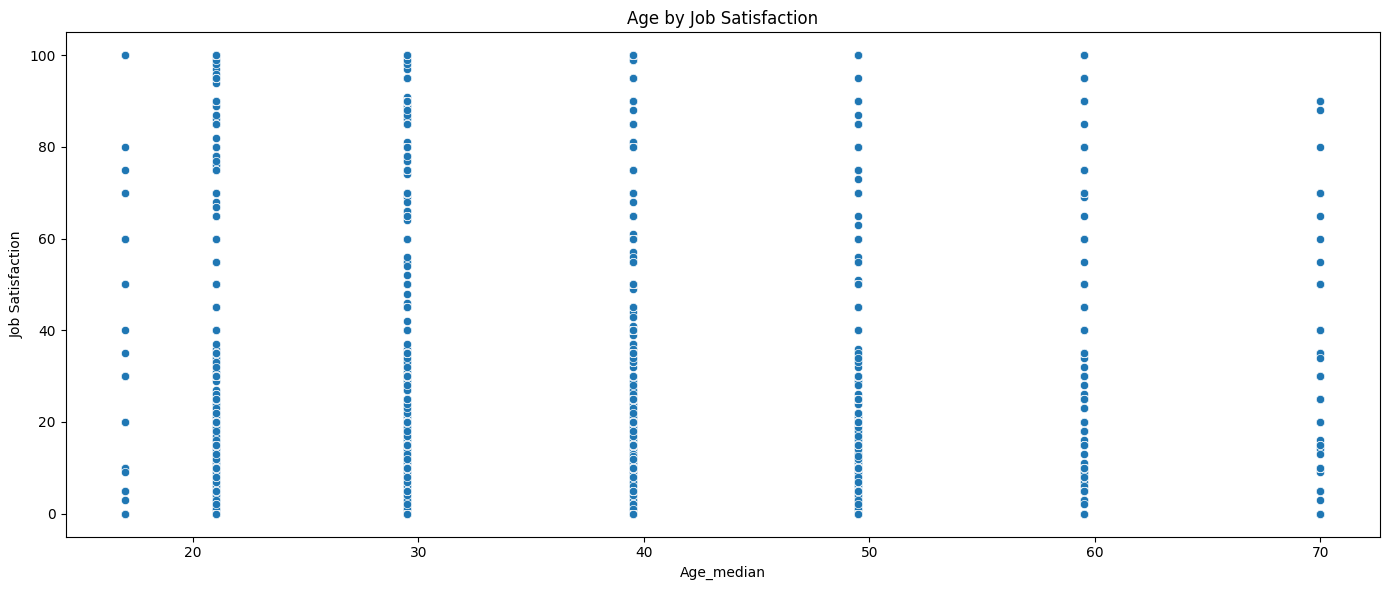

In [7]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=age_sat, x="Age_median", y="JobSatPoints_6")

plt.title("Age by Job Satisfaction")
plt.ylabel("Job Satisfaction")
plt.xlabel("Age_median")
plt.savefig("Lab 19 Plots/Step 1-1 Age by Job Satisfaction")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [8]:
comp_sat = df.copy().loc[:,["ConvertedCompYearly", "JobSatPoints_6"]].dropna()

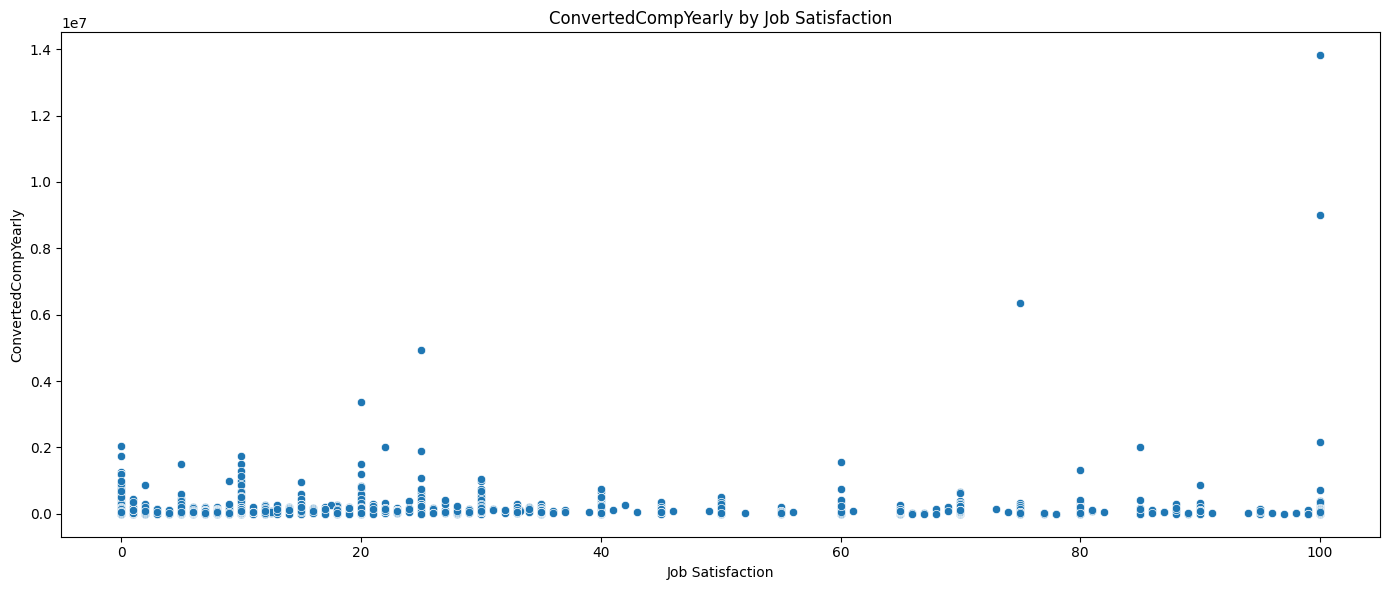

In [9]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=comp_sat, x="JobSatPoints_6", y="ConvertedCompYearly")

plt.title("ConvertedCompYearly by Job Satisfaction")
plt.ylabel("ConvertedCompYearly")
plt.xlabel("Job Satisfaction")
plt.savefig("Lab 19 Plots/Step 1-2 ConvertedCompYearly by Job Satisfaction")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


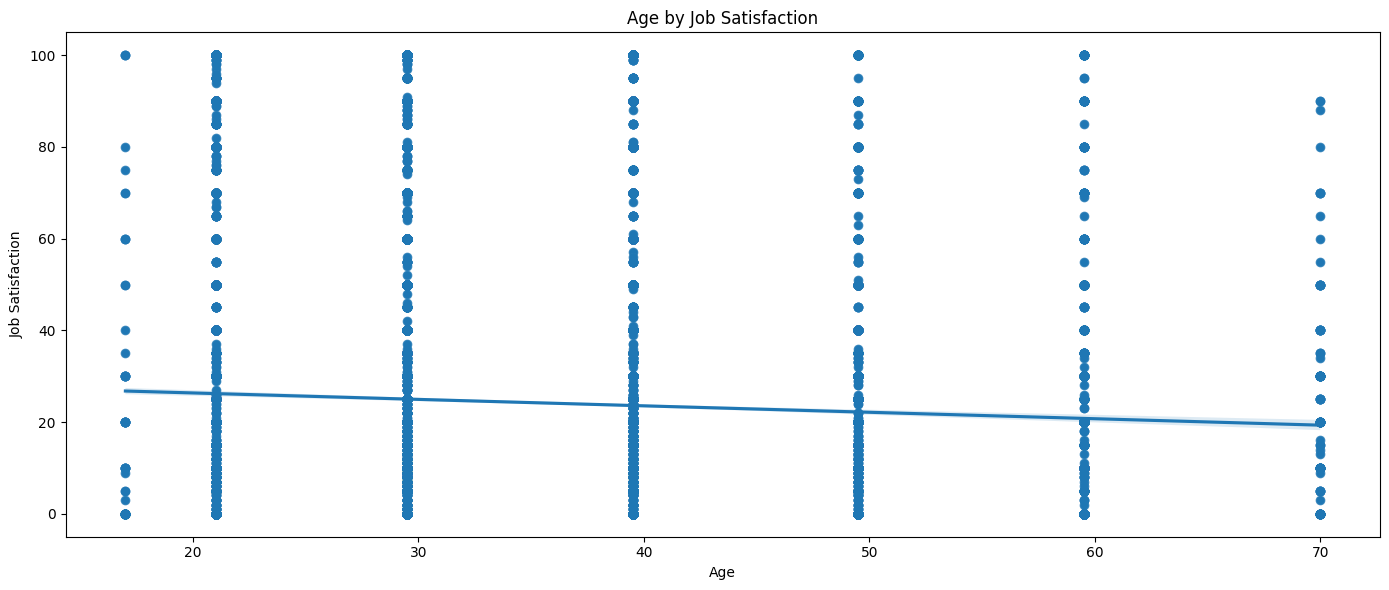

In [10]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=age_sat, x="Age_median", y="JobSatPoints_6")
sns.regplot(data=age_sat, x="Age_median", y="JobSatPoints_6")
plt.title("Age by Job Satisfaction")
plt.ylabel("Job Satisfaction")
plt.xlabel("Age")
plt.savefig("Lab 19 Plots/Step 2-1 Age by Job Satisfaction with Regression")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [11]:
exp_map = {
    'Less than 1 year': 0.5,
    'More than 50 years': 50
}

df["YearsCodePro"] = df["YearsCodePro"].replace(exp_map)

In [12]:
age_exp = df.copy().loc[:,["Age_median", "YearsCodePro"]].dropna()
age_exp["YearsCodePro"] = pd.to_numeric(age_exp["YearsCodePro"], errors='coerce')

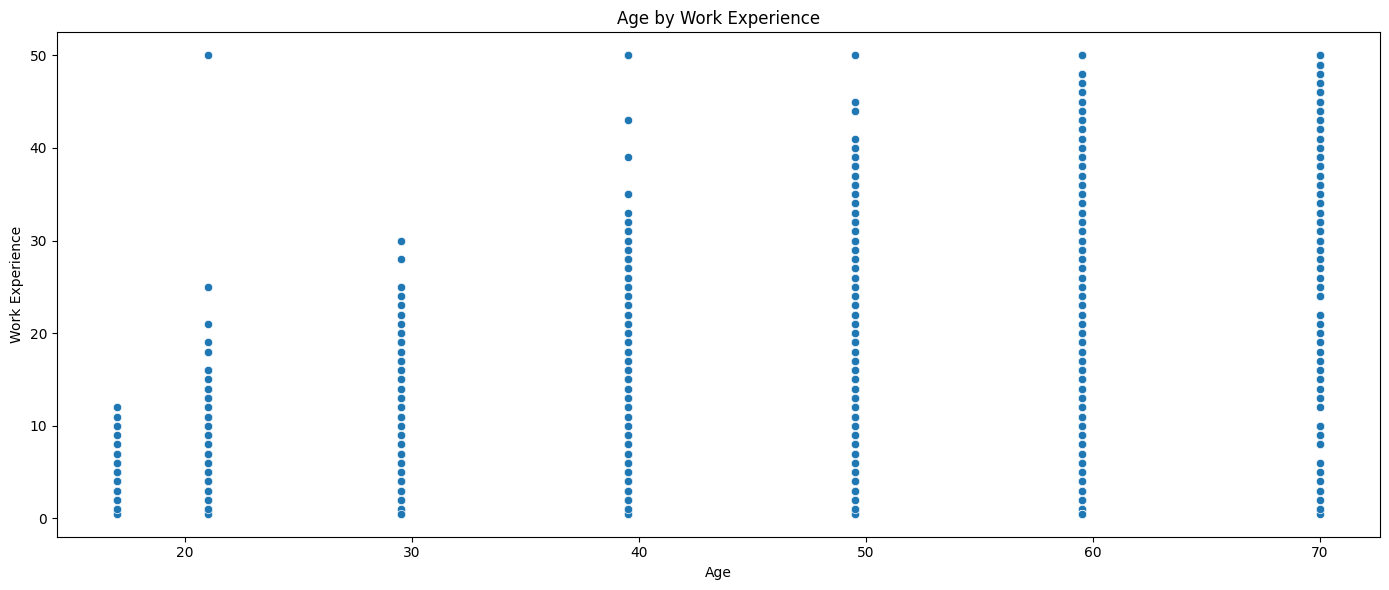

In [13]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=age_exp, x="Age_median", y="YearsCodePro")
plt.title("Age by Work Experience")
plt.ylabel("Work Experience")
plt.xlabel("Age")
plt.savefig("Lab 19 Plots/Step 2-2 Age by Work Experience")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [14]:
comp_sat_age = df.copy().loc[:,["ConvertedCompYearly", "JobSatPoints_6", "Age_median"]].dropna()
comp_sat_age["BubbleSize"] = comp_sat_age["Age_median"] * 5

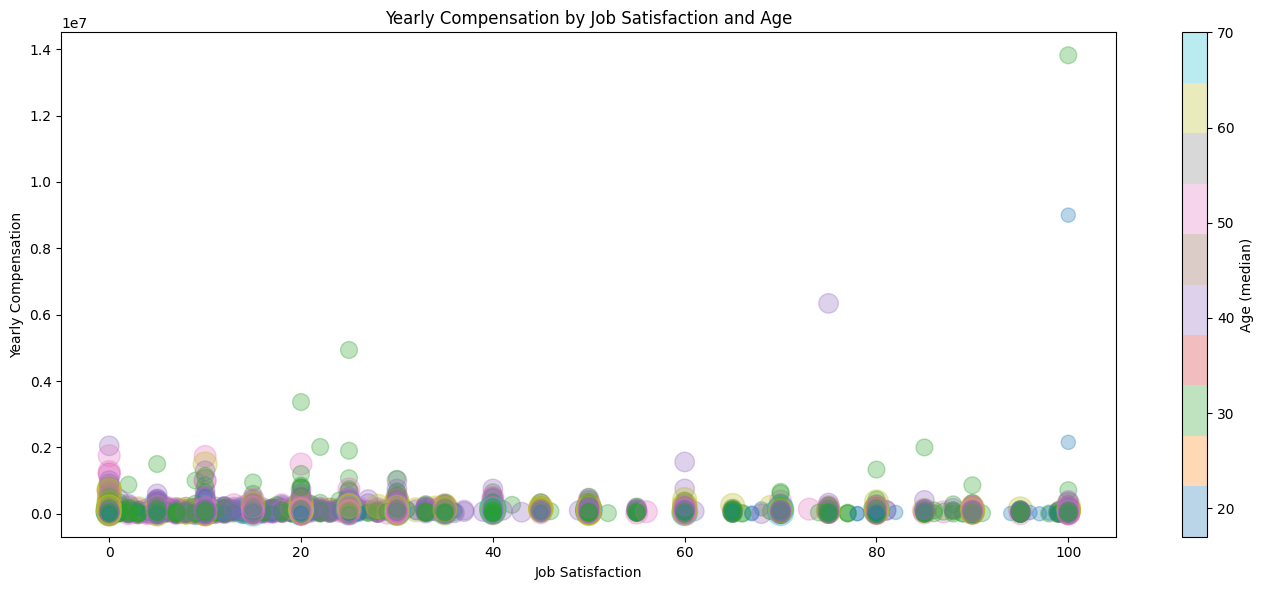

In [15]:
plt.figure(figsize=(14,6))
scatter = plt.scatter(data=comp_sat_age, x="JobSatPoints_6", y="ConvertedCompYearly", marker='o', s="BubbleSize", c="Age_median", cmap='tab10', alpha=0.3)
plt.title("Yearly Compensation by Job Satisfaction and Age")
plt.ylabel("Yearly Compensation")
plt.xlabel("Job Satisfaction")

cbar = plt.colorbar(scatter)
cbar.set_label("Age (median)")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.savefig("Lab 19 Plots/Step 3-1 Yearly Compensation by Job Satisfaction and Age")
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [16]:
lang_sat = df.copy().loc[:,["LanguageHaveWorkedWith", "JobSatPoints_6"]].dropna()
lang_sat["LanguageHaveWorkedWith"] = lang_sat["LanguageHaveWorkedWith"].str.split(";")
lang_sat = lang_sat.explode("LanguageHaveWorkedWith")

In [17]:
top_5_langs = lang_sat["LanguageHaveWorkedWith"].value_counts().index.values[:5]
top_5 = lang_sat[lang_sat["LanguageHaveWorkedWith"].isin(top_5_langs)]

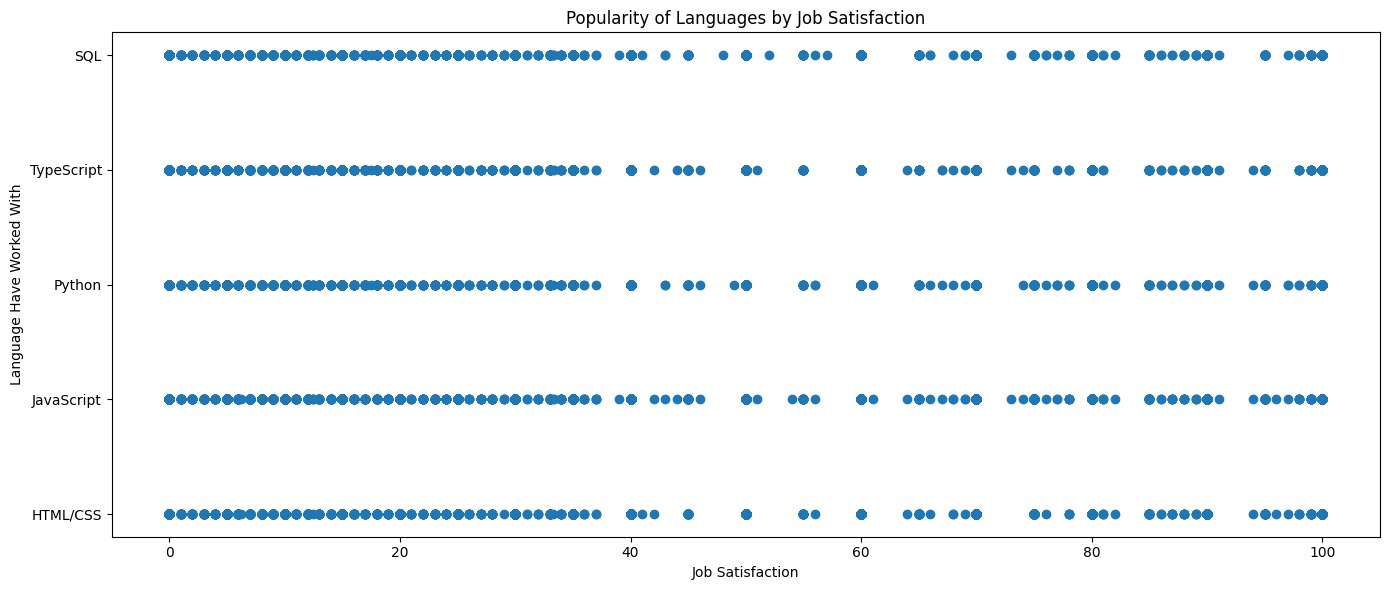

In [18]:
plt.figure(figsize=(14,6))
plt.scatter(data=top_5, x="JobSatPoints_6", y="LanguageHaveWorkedWith")
plt.title("Popularity of Languages by Job Satisfaction")
plt.ylabel("Language Have Worked With")
plt.xlabel("Job Satisfaction")
plt.savefig("Lab 19 Plots/Step 3-2 Popularity of Languages by Job Satisfaction")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [19]:
comp_sat_emp = df.copy().loc[:, ["ConvertedCompYearly", "JobSatPoints_6", "Employment"]]
comp_sat_emp["Employment"] = comp_sat_emp["Employment"].str.split(";")
comp_sat_emp = comp_sat_emp.explode("Employment").dropna()

In [20]:
comp_sat_emp["Employment_code"] = pd.Categorical(comp_sat_emp["Employment"]).codes

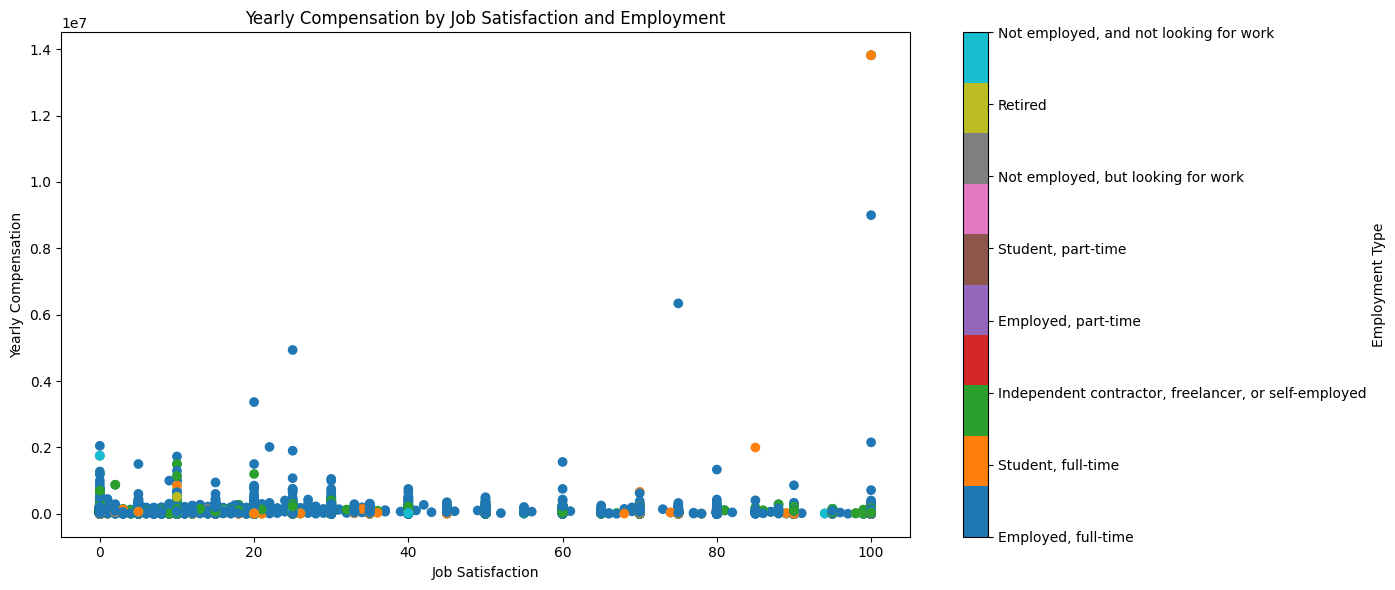

In [21]:
plt.figure(figsize=(14,6))
scatter = plt.scatter(data=comp_sat_emp, x="JobSatPoints_6", y="ConvertedCompYearly", c="Employment_code", cmap='tab10')
plt.title("Yearly Compensation by Job Satisfaction and Employment")
plt.ylabel("Yearly Compensation")
plt.xlabel("Job Satisfaction")

cbar = plt.colorbar(scatter)
cbar.set_ticks(range(len(comp_sat_emp["Employment"].unique())))
cbar.set_ticklabels(comp_sat_emp["Employment"].unique())
cbar.set_label("Employment Type")

# Tidy up spacing so titles/labels don't overlap
plt.tight_layout()
plt.savefig("Lab 19 Plots/Step 4-1 Yearly Compensation by Job Satisfaction and Employment")
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [31]:
df = pd.read_csv(file_name)
exp_age_country = df.copy().loc[:,["YearsCodePro", "Age", "Country"]].dropna()

In [32]:
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old",
    "35-44 years old", "45-54 years old", "55-64 years old",
    "65 years or older", "Prefer not to say"
]
if exp_age_country["Age"].dtype == object:
    exp_age_country["Age"] = pd.Categorical(exp_age_country["Age"], categories=age_order, ordered=True)

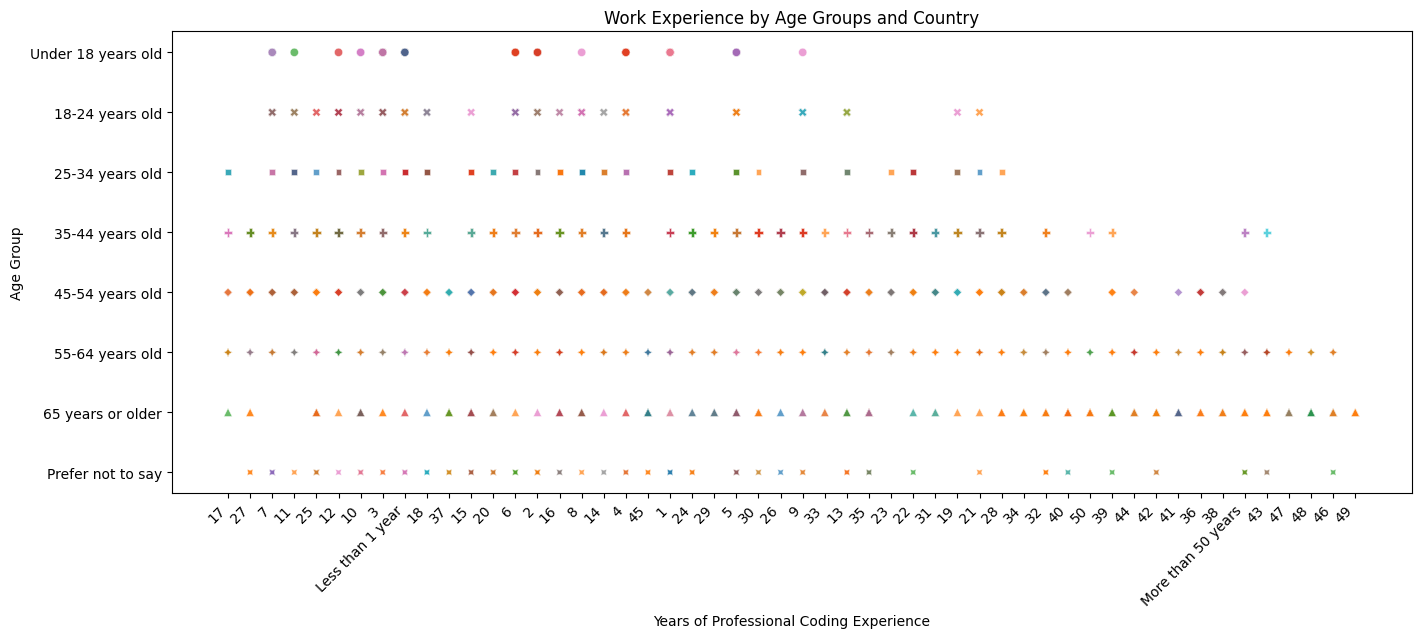

In [41]:
plt.figure(figsize=(16, 6))
sns.scatterplot(
    data=exp_age_country,
    x="YearsCodePro",
    y="Age",
    hue="Country",       # colors by country
    style="Age",         # marker shapes by age group
    palette="tab10",
    alpha=0.7,
    legend=False
)

plt.title("Work Experience by Age Groups and Country")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Age Group")
plt.xticks(rotation=45, ha='right')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig("Lab 19 Plots/Step 4-2 Work Experience by Age and Country")
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
